In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import requests


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

In [4]:
url_confirmed="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
url_deaths="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

confirmed = pd.read_csv(url_confirmed)
recovered = pd.read_csv(url_recovered)
deaths = pd.read_csv(url_deaths)

# Linear Regression

## Constuction des datas

On construit la matrice X qui représente les **w intervals** depuis le début de notre série temporelle à la fin de la série temporelle.

Cette matrice historise les valeurs de la série tempoerelle et est utilisé pour prédire les prochaines valeurs de la série $ỹ$ :
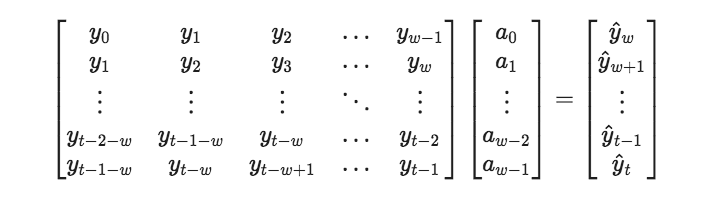


In [5]:
start = 10
middle = len(i_confirmed) - 10
end = len(i_confirmed) - 1

NameError: name 'i_confirmed' is not defined

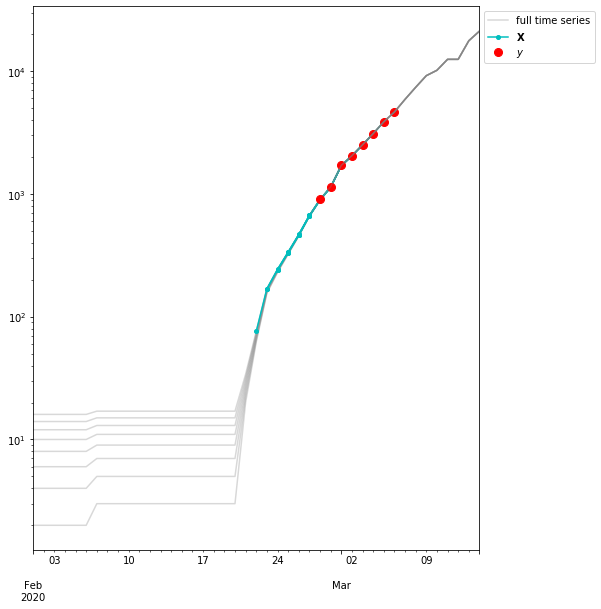

In [13]:
fig, ax = plt.subplots(figsize=(8, 10))

window = 6

for i in range(8):

    full = i_confirmed[start:end]
    train = i_confirmed[middle - i - window:middle - i]
    predict = i_confirmed[middle - i:middle - i + 1]

    (full + 2 * i).plot(ax=ax, c="grey", alpha=0.3)
    (train + 2 * i).plot(ax=ax, c="c", markersize=4, marker="o")
    (predict + 2 * i).plot(ax=ax, c="r", markersize=8, marker="o", linestyle="")

ax.get_yaxis().set_ticks([])
ax.set_yscale("log")

ax.legend(["full time series", "$\mathbf{X}$", "$y$"], bbox_to_anchor=(1, 1))

In [14]:
window = 5
num_samples = 10
X_mat = []
y_mat = []
for i in range(num_samples):
    # Slice a window of features
    X_mat.append(i_confirmed[middle - i - window:middle - i].values)
    y_mat.append(i_confirmed[middle - i:middle - i + 1].values)

X_mat = np.vstack(X_mat)
y_mat = np.concatenate(y_mat)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression(fit_intercept=False)
lr = lr.fit(X_mat, y_mat)

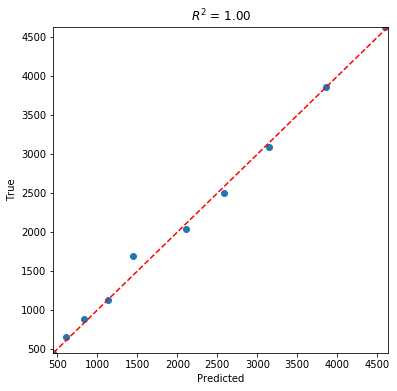

In [16]:
y_pred = lr.predict(X_mat)

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_pred, y_mat)

one_to_one = np.arange(y_mat.min() - 2, y_mat.max() + 2)
ax.plot(one_to_one, one_to_one, c="r", linestyle="--")

ax.set_xlim((one_to_one[0], one_to_one[-1]))
ax.set_ylim((one_to_one[0], one_to_one[-1]))
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title(f"$R^{2}$ = {r2_score(y_mat, y_pred):3.2f}");